In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,82,72,27,100,42.8,0.255,31,1
1,1,135,67,28,104,33.9,0.694,32,1
2,7,92,73,2,96,26.5,2.310,31,0
3,2,138,66,33,0,22.8,0.587,34,1
4,7,180,67,30,2,26.0,0.739,30,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               477 non-null    int64  
 1   Glucose                   477 non-null    int64  
 2   BloodPressure             477 non-null    int64  
 3   SkinThickness             477 non-null    int64  
 4   Insulin                   477 non-null    int64  
 5   BMI                       477 non-null    float64
 6   DiabetesPedigreeFunction  477 non-null    float64
 7   Age                       477 non-null    int64  
 8   Outcome                   477 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 33.7 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000
mean,6.209644,133.423480,76.104822,51.073375,154.589099,33.083438,1.209671,40.691824,0.645702
std,4.100378,37.293872,23.818147,25.691464,76.827749,9.077907,0.693176,18.775302,0.478802
min,0.000000,50.000000,30.000000,0.000000,0.000000,15.100000,0.126000,10.000000,0.000000
25%,3.000000,105.000000,61.000000,30.000000,92.000000,25.400000,0.624000,26.000000,0.000000
50%,6.000000,137.000000,75.000000,49.000000,149.000000,33.400000,1.126000,38.000000,1.000000
75%,9.000000,162.000000,95.000000,73.000000,216.000000,40.800000,1.822000,55.000000,1.000000
max,14.000000,199.000000,119.000000,98.000000,299.000000,49.500000,2.489000,78.000000,1.000000


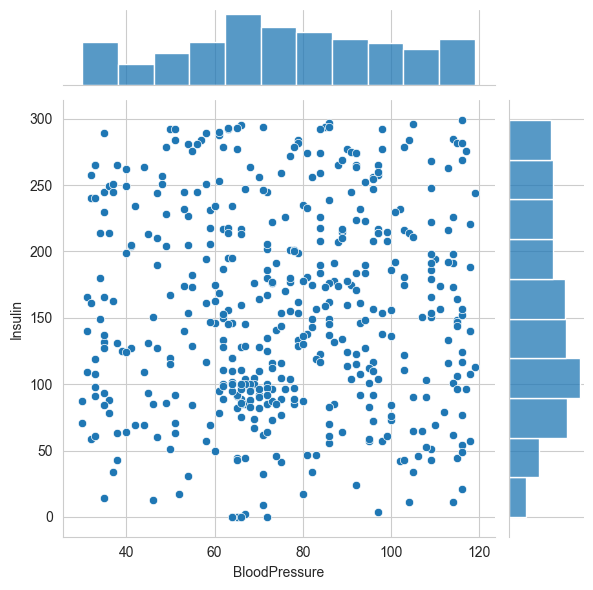

In [5]:
sbn.set_style("whitegrid")
grid = sbn.JointGrid(x = "BloodPressure",y = "Insulin",data = df)
grid.plot(sbn.scatterplot,sbn.histplot)

<Axes: xlabel='Glucose', ylabel='Count'>

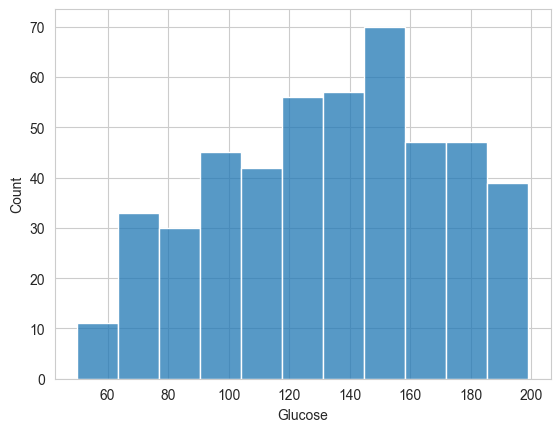

In [6]:
sbn.histplot(x = "Glucose",data = df)

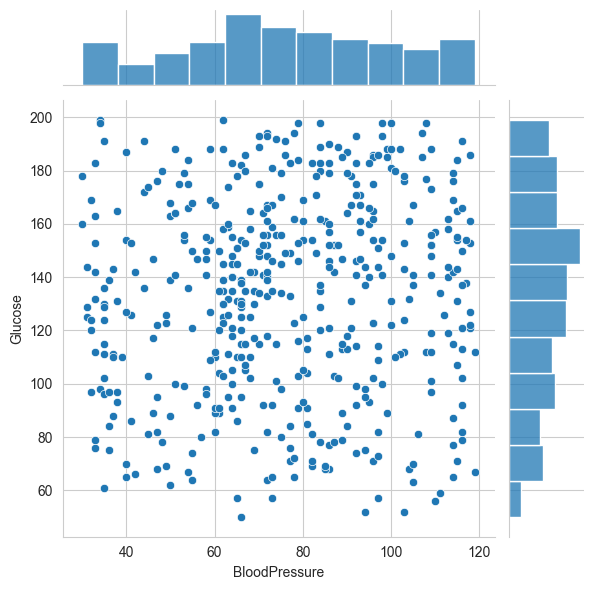

In [7]:
sbn.set_style("whitegrid")
grid = sbn.JointGrid(x = "BloodPressure",y = "Glucose",data = df)
grid.plot(sbn.scatterplot,sbn.histplot)

<Axes: >

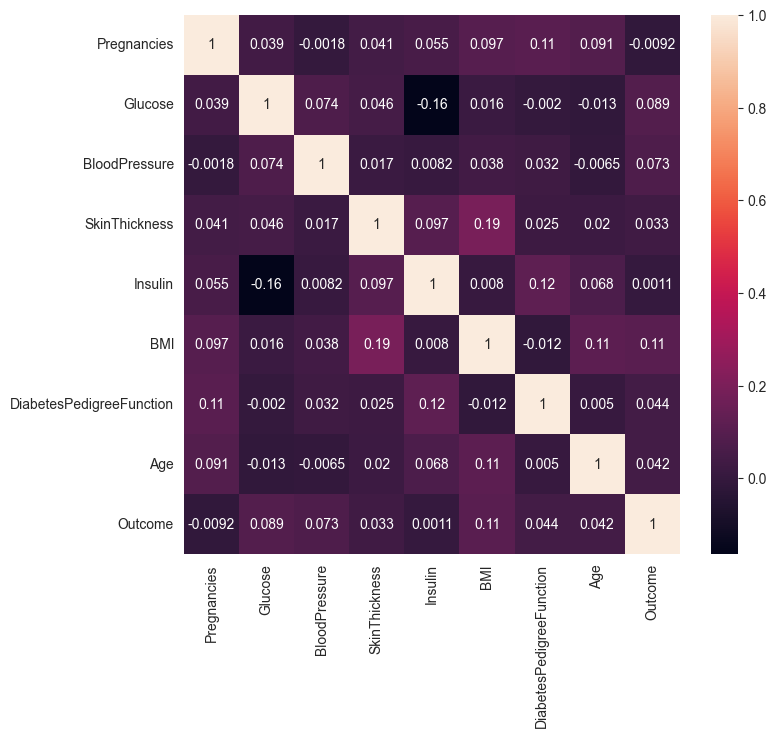

In [8]:
plt.figure(figsize=(8,7))
sbn.heatmap(df.corr(),annot=True)

<Axes: xlabel='Glucose', ylabel='Outcome'>

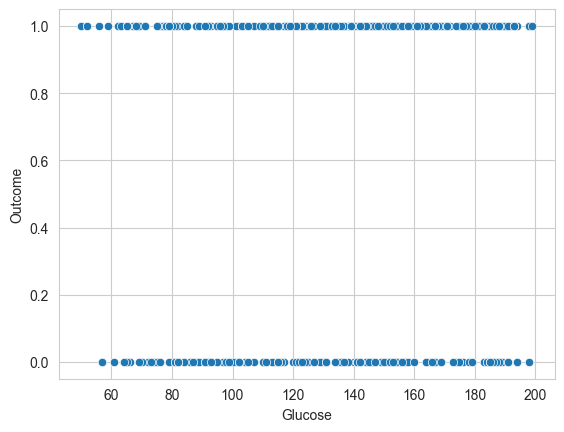

In [9]:
sbn.scatterplot(x = "Glucose",y = "Outcome",data = df)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

In [13]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test  = scaler.transform(X_test)

## Model

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log = LogisticRegression()
log.fit(scaled_X_train,y_train)

LogisticRegression()

In [16]:
log.coef_

array([[-0.04418444,  0.19782908,  0.06727612, -0.01741363,  0.02390134,
         0.22267097,  0.11109625,  0.10076022]])

In [17]:
coef = pd.Series(index=X.columns,data = log.coef_[0])
coef.sort_values(inplace=True)

/var/folders/1g/2ly16xp16j10q0hkqyfm0xtc0000gn/T/ipykernel_49463/3953996634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.barplot(x = coef.index,y = coef.values,palette = "bright")


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'SkinThickness'),
  Text(2, 0, 'Insulin'),
  Text(3, 0, 'BloodPressure'),
  Text(4, 0, 'Age'),
  Text(5, 0, 'DiabetesPedigreeFunction'),
  Text(6, 0, 'Glucose'),
  Text(7, 0, 'BMI')])

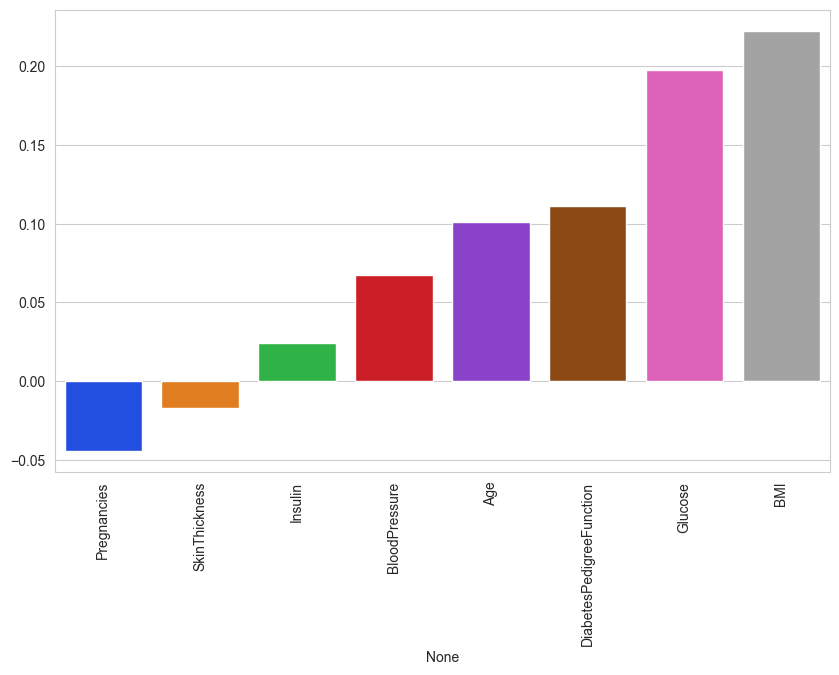

In [19]:
plt.figure(figsize=(10,6))
sbn.barplot(x = coef.index,y = coef.values,palette = "bright")
plt.xticks(rotation = 90)

## Performance

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [21]:
sick_pred = log.predict(scaled_X_test)

In [22]:
accuracy_score(y_test,sick_pred)

0.6770833333333334

In [23]:
cm = confusion_matrix(y_test,sick_pred)

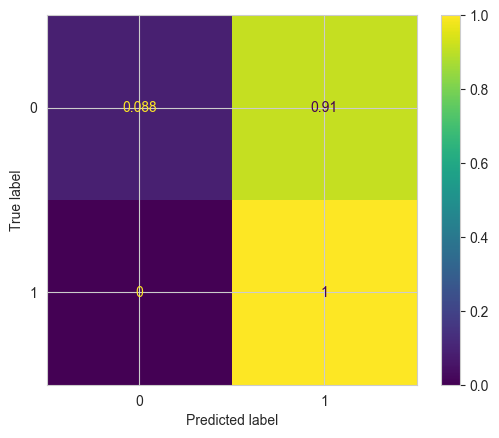

In [25]:
ConfusionMatrixDisplay.from_estimator(log,scaled_X_test,y_test,normalize="true")

In [26]:
print(classification_report(y_test,sick_pred))

              precision    recall  f1-score   support

           0       1.00      0.09      0.16        34
           1       0.67      1.00      0.80        62

    accuracy                           0.68        96
   macro avg       0.83      0.54      0.48        96
weighted avg       0.78      0.68      0.57        96



## Save Model

In [33]:
import joblib

In [38]:
filename = "log_model.sav"
joblib.dump(log,filename)

['log_model.sav']

In [39]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000
mean,6.209644,133.423480,76.104822,51.073375,154.589099,33.083438,1.209671,40.691824,0.645702
std,4.100378,37.293872,23.818147,25.691464,76.827749,9.077907,0.693176,18.775302,0.478802
min,0.000000,50.000000,30.000000,0.000000,0.000000,15.100000,0.126000,10.000000,0.000000
25%,3.000000,105.000000,61.000000,30.000000,92.000000,25.400000,0.624000,26.000000,0.000000
50%,6.000000,137.000000,75.000000,49.000000,149.000000,33.400000,1.126000,38.000000,1.000000
75%,9.000000,162.000000,95.000000,73.000000,216.000000,40.800000,1.822000,55.000000,1.000000
max,14.000000,199.000000,119.000000,98.000000,299.000000,49.500000,2.489000,78.000000,1.000000


In [40]:
sick = [[6,51,76,20,33,33,2.1,30]]

In [41]:
model = joblib.load("log_model.sav")

In [42]:
model.predict(sick)

array([1])

In [43]:
model.predict_proba(sick)

array([[2.80420132e-12, 1.00000000e+00]])